<a href="https://colab.research.google.com/github/Shayshoon/ML_1/blob/main/HW1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab

params = {'xtick.labelsize': 18,
'ytick.labelsize': 18,
'axes.titlesize' : 22,
'axes.labelsize' : 20,
'legend.fontsize': 18,
'legend.title_fontsize': 22,
'figure.titlesize': 24 }
pylab.rcParams.update(params)

## Loading the dataset

In [22]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [23]:
dataset = pd.read_csv(filename)

In [24]:
dataset.head()

,patient_id,age,sex,weight,blood_type,current_location,num_of_siblings,happiness_score,household_income,PCR_02,...,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk
0,709,12,F,39.5,O+,0,2,10,0.2,-2.252313,...,8.746008,-20.185555,10.258711,-16.476419,2.527249,165.077123,-8.030827,3.238998,-1,1
1,732,11,M,25.5,A-,0,1,10,0.2,0.260965,...,7.983439,26.130060,0.902658,97.006095,5.587010,-199.137766,-8.639753,1.750876,-1,1
2,662,6,M,22.0,O+,0,1,8,1.4,-0.010231,...,7.803041,-40.482717,1.944847,50.996507,3.922017,-73.634680,-9.304190,3.037626,1,-1
3,46,3,M,25.4,A+,0,3,9,NaN,0.762668,...,7.228079,-50.649850,9.943822,86.738847,2.956860,-46.209955,-4.263932,0.947817,-1,-1
4,302,14,F,48.1,O-,0,0,10,NaN,0.109750,...,6.991015,-49.426280,1.977101,-22.673927,3.712693,178.000758,-11.629145,1.227133,-1,-1


# How to download from Colab?

In [25]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
print(dataset.conversations_per_day.value_counts())

conversations_per_day
2     220
4     207
3     201
5     153
6     125
1     115
7      77
8      52
10     33
9      23
11     14
12     10
13      7
16      4
14      4
17      3
21      2
Name: count, dtype: int64


```
conversations_per_day
2     220
4     207
3     201
5     153
6     125
1     115
7      77
8      52
10     33
9      23
11     14
12     10
13      7
16      4
14      4
17      3
21      2
Name: count, dtype: int64
```
This feature represents the amount of face-to-face conversations a person makes a day.
This feature has a natural order. The more conversations a person makes per day, the bigger the number. It's not continuous, because there is no clear meaning to the ratio between two different categories (number of conversations per day).


In [27]:
dataset.pcr_date.value_counts()

,count
pcr_date,
2021-07-20,9
2022-05-18,7
2022-07-18,6
2022-04-28,6
2021-09-04,6
...,...
2021-09-09,1
2022-06-10,1
2021-10-23,1


'patient_id' - \
'age' - Age (Continuous)\
'sex' - Biological sex (Categorical)\
'weight' - Weight, measured in KG (Continuous)\
'blood_type' - Blood type (Categorical)\
'current_location' - Junk feature, all datapoints have current_location as 0\
'num_of_siblings' - Number of siblings (Ordinal)\
'happiness_score' - Happiness score as surveyed by the patient (Ordinal)\
'household_income' - Household income (Continuous)\
'conversations_per_day' - Average amount of face-to-face conversations the patient made a day (Ordinal)\
'sugar_levels' - Blood sugar levels (Continuous)\
'sport_activity' - Number of times doing physical excersize a week (Ordinal)\
'pcr_date' - Date which notes when PCR test was conducted - (Ordinal)\
'PCR_01'\
'PCR_02'\
'PCR_03'\
'PCR_04'\
'PCR_05'\
'PCR_06'\
'PCR_07'\
'PCR_08'\
'PCR_09'\
'PCR_10'\

In [28]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=15)

In [29]:
for key in train_df.keys():
  print(key, train_df[key].isnull().sum())

patient_id 0
age 0
sex 0
weight 0
blood_type 0
current_location 0
num_of_siblings 0
happiness_score 0
household_income 113
PCR_02 59
conversations_per_day 0
sugar_levels 0
sport_activity 0
pcr_date 0
PCR_01 0
PCR_03 0
PCR_04 0
PCR_05 0
PCR_06 0
PCR_07 0
PCR_08 0
PCR_09 0
PCR_10 0
spread 0
risk 0


In [30]:
for key in test_df.keys():
  print(key, test_df[key].isnull().sum())

patient_id 0
age 0
sex 0
weight 0
blood_type 0
current_location 0
num_of_siblings 0
happiness_score 0
household_income 26
PCR_02 15
conversations_per_day 0
sugar_levels 0
sport_activity 0
pcr_date 0
PCR_01 0
PCR_03 0
PCR_04 0
PCR_05 0
PCR_06 0
PCR_07 0
PCR_08 0
PCR_09 0
PCR_10 0
spread 0
risk 0


In [31]:
def plot_box(series, title, xlabel):
  cleaned_series = series.dropna()
  plt.figure(figsize=(8, 6))
  plt.boxplot(cleaned_series,
  vert=False)
  plt.xlabel(xlabel)
  plt.title(title)

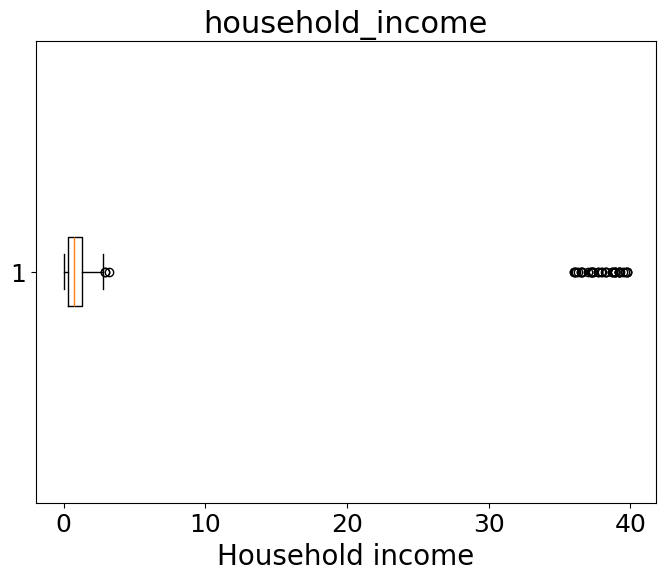

In [32]:
lbl, description = "household_income", "Household income"
plot_box(train_df[lbl], lbl, description)

Q6:

Outliers are datapoints, or samples, that don't properly represent the pattern of the dataset. They could result from errors of measurement, or represent extreme cases which can heavily influence our analysis of the dataset.

Box plots help us identify the outliers in our by illustrating its distribution.\
The plot has a few key elements. The box, representing 50% of the datapoints, The yellow line representing the median, The whiskers, which extend to the minimum and maximum value of datapoints that are not outliers. And of course the hollow dots which represent the outliers in our dataset.

In the fields we just plotted there are alot of outliers.\
The household outcome for most of our datapoints are in the range $(0,\text{~3})$, but there are a few outliers in the range $(35, 40)$.\
The `PCR_02` field, for most of our data is approximately in the range $(-2.5,2.5)$, but there are many outliers in this field, too.

In [33]:
print("mean:", train_df.household_income.mean(),"\n", "median:", train_df.household_income.median())
print("mean:", train_df.PCR_02.mean(),"\n", "median:", train_df.PCR_02.median())

mean: 2.487373167981962 
 median: 0.7
mean: 0.5121088283671074 
 median: 0.0349643972615623


Q7:

For the `household_income` field, the mean is ~2.487 and the median is 0.7\
The reason for the significant difference is the outliers. Because there are a few datapoints with significantly larger values than most of the dataset, they heavily influence the mean. Because there are relatively few outliers, the median still represents most of the data much better.

For the `PCR_02` field, the mean is ~0.5121 and the median is ~0.0349
The difference here is cause by a similar reason to the last field. there are few datapoints with significantly larger values that affect the mean, but not the median.

For these reasons, in our opinion, filling the missing values with the median values is the better option. We don't want the new values to be determined by the outliers in our dataset.

In [36]:
hhi = train_df.household_income.median()
pcr = train_df.PCR_02.median()
train_df.fillna(value={"household_income": hhi, "PCR_02": pcr}, inplace=True)

In [38]:
for key in train_df.keys():
  print(key, train_df[key].isnull().sum())

patient_id 0
age 0
sex 0
weight 0
blood_type 0
current_location 0
num_of_siblings 0
happiness_score 0
household_income 0
PCR_02 0
conversations_per_day 0
sugar_levels 0
sport_activity 0
pcr_date 0
PCR_01 0
PCR_03 0
PCR_04 0
PCR_05 0
PCR_06 0
PCR_07 0
PCR_08 0
PCR_09 0
PCR_10 0
spread 0
risk 0
